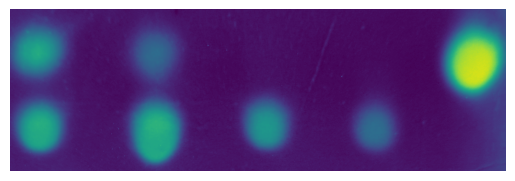

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline
img = Image.open('Fig4a.png')
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

C:\Users\Dhara\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


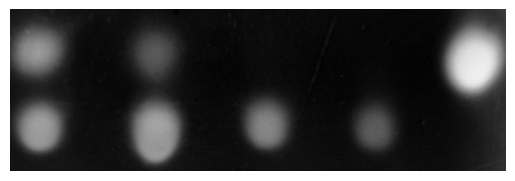

In [3]:
from skimage import io, color

rgb_img = img.convert('RGB')

# Convert the RGB image to grayscale
grayscale_img = color.rgb2gray(rgb_img)

# Display the grayscale image
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.show()

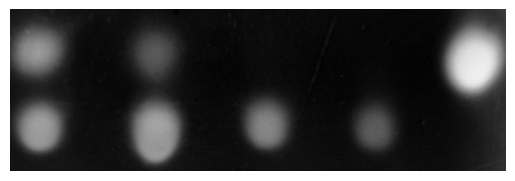

In [4]:
# if you have plots in the above cell with white spots on a black background
inverted_img =  grayscale_img

# otherwise uncommented below and comment up
#inverted_img = 1.0 - grayscale_img

# Display the inverted grayscale image
plt.imshow(inverted_img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
np.shape(inverted_img)

(912, 2800)

# STOP

## before running the cell below, change the number in 'nlanes' to reflect the correct number of lanes in the current image. 

## this code saves data in all_profiles.csv

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
from skimage.measure import profile_line
import pandas as pd

# Note: If not using Jupyter Notebook, remove the next line.
%matplotlib qt

# Assuming inverted_img is already loaded or defined. If not, you may need to read or define it.
A = np.shape(inverted_img)

# Number of lanes
nlanes = 5 

plt.imshow(inverted_img)
click = plt.ginput(nlanes) # click on top of the lanes

profiles = []  # list to store all profiles
starts = [] # list to store start points
ends = [] # list to store end points

# Placeholder values for max_intensity and max_length
max_intensity = 0
max_length = 0

for i in range(nlanes):
    click_x = click[i][0]
    start = (0, click_x)
    starts.append(start)
    end = (A[0], click_x)
    ends.append(end)

    profile = profile_line(inverted_img, start, end, linewidth=2)
    profiles.append(profile)

    # Update max_intensity and max_length if necessary
    max_intensity = max(max_intensity, np.max(profile))
    max_length = max(max_length, len(profile))

# Convert profiles to DataFrame
df_pixel = pd.DataFrame({'Pixel': np.arange(1, A[0] + 1)})

dfs = [df_pixel]
for i, profile in enumerate(profiles):
    column_name = f"profile_{i}"
    dfs.append(pd.DataFrame({column_name: profile}))

df_combined = pd.concat(dfs, axis=1)
df_combined.to_csv("all_profiles.csv", index=False)

# Plotting the profiles
fig, ax = plt.subplots(nlanes, 2, figsize=(10, nlanes*5))

for i in range(nlanes):
    ax[i, 0].imshow(inverted_img)
    ax[i, 0].plot([starts[i][1], ends[i][1]], [starts[i][0], ends[i][0]], 'r')
    ax[i, 0].set_ylim([0, A[0]])
    ax[i, 1].plot(profiles[i])
    ax[i, 1].set_ylim([0, max_intensity+0.2])
    ax[i, 1].set_xlim([0, max_length])
    ax[i, 1].set_xlabel('Pixel')
    ax[i, 1].set_ylabel('Intensity')

plt.tight_layout()
plt.show()


# Extra
## Plotting again after importing the all_profiles.csv

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_combined = pd.read_csv('all_profiles.csv')

# Extract the 'Pixel' data
pixel_data = df_combined['Pixel']

# Plot
plt.figure(figsize=(10, 6))

# Loop through each profile and plot it
for column in df_combined.columns:
    if column != 'Pixel':
        plt.plot(pixel_data, df_combined[column], label=column)

plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Profiles vs Pixel')
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()
